In [11]:
import re # 정규 표현식
import pandas as pd
from konlpy.tag import Okt # 한국어 자연어 처리를 위한 다양한 도구를 제공하는 라이브러리
from collections import Counter # 해시 테이블을 사용하여 객체의 개수를 세는 데 유용한 클래스
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import nltk # Natural Language ToolKit
from functools import reduce # iterable 항목에 이진함수를 누적 적용 하여 단일 값으로 줄임
from nltk.tokenize import word_tokenize # 문자열을 개별 단어(토큰)로 분할
from nltk.corpus import stopwords # 불용어 가져오기
from nltk.stem import WordNetLemmatizer # 데이터 정규화
from collections import Counter
from wordcloud import STOPWORDS, WordCloud

In [3]:
netflix_df = pd.read_csv("csv/netflix_titles.csv")
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [7]:
netflix_df["description"].isnull().sum()

0

In [5]:
netflix_all_des = netflix_df["description"]
netflix_all_des

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

In [13]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()
words = []

for des in netflix_all_des:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(des)) 
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 출력값 for 변수 in 반복가능한 객체 if 조건
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
print(words)

[['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slum', 'get', 'one', 'chance', 'join', 'saved', 'squalor'], ['devastating', 'earthquake', 'hit', 'mexico', 'city', 'trapped', 'survivor', 'walk', 'life', 'wait', 'rescued', 'trying', 'desperately', 'stay', 'alive'], ['army', 'recruit', 'found', 'dead', 'fellow', 'soldier', 'forced', 'confront', 'terrifying', 'secret', 'haunting', 'jungle', 'island', 'training', 'camp'], ['postapocalyptic', 'world', 'rag', 'doll', 'robot', 'hide', 'fear', 'dangerous', 'machine', 'exterminate', 'brave', 'newcomer', 'join', 'group'], ['brilliant', 'group', 'student', 'become', 'card', 'counting', 'expert', 'intent', 'swindling', 'million', 'la', 'vega', 'casino', 'playing', 'blackjack'], ['genetics', 'professor', 'experiment', 'treatment', 'comatose', 'sister', 'blend', 'medical', 'shamanic', 'cure', 'unlocks', 'shocking', 'side', 'effect'], ['awful', 'accident', 'couple', 'admitted', 'grisly', 'hospital', 'separated', 'must', 'find'

In [15]:
print(type(words))

<class 'list'>


In [17]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2) #작업 내용 확인용 출력

['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slum', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'devastating', 'earthquake', 'hit', 'mexico', 'city', 'trapped', 'survivor', 'walk', 'life', 'wait', 'rescued', 'trying', 'desperately', 'stay', 'alive', 'army', 'recruit', 'found', 'dead', 'fellow', 'soldier', 'forced', 'confront', 'terrifying', 'secret', 'haunting', 'jungle', 'island', 'training', 'camp', 'postapocalyptic', 'world', 'rag', 'doll', 'robot', 'hide', 'fear', 'dangerous', 'machine', 'exterminate', 'brave', 'newcomer', 'join', 'group', 'brilliant', 'group', 'student', 'become', 'card', 'counting', 'expert', 'intent', 'swindling', 'million', 'la', 'vega', 'casino', 'playing', 'blackjack', 'genetics', 'professor', 'experiment', 'treatment', 'comatose', 'sister', 'blend', 'medical', 'shamanic', 'cure', 'unlocks', 'shocking', 'side', 'effect', 'awful', 'accident', 'couple', 'admitted', 'grisly', 'hospital', 'separated', 'must', 'find', 'escape', '

In [19]:
count = Counter(words2)
count 

Counter({'life': 1008,
         'young': 655,
         'family': 620,
         'new': 613,
         'woman': 592,
         'find': 578,
         'friend': 548,
         'world': 521,
         'love': 496,
         'man': 490,
         'two': 443,
         'take': 439,
         'year': 430,
         'series': 358,
         'one': 346,
         'get': 339,
         'must': 332,
         'documentary': 329,
         'school': 312,
         'help': 300,
         'story': 296,
         'father': 294,
         'home': 282,
         'old': 279,
         'high': 274,
         'three': 263,
         'girl': 257,
         'secret': 239,
         'group': 235,
         'teen': 235,
         'team': 233,
         'set': 230,
         'student': 226,
         'try': 219,
         'go': 217,
         'make': 210,
         'murder': 206,
         'son': 205,
         'time': 205,
         'star': 204,
         'daughter': 202,
         'special': 201,
         'city': 200,
         'fall': 199,
     

In [23]:
word_count = dict()

for tag, counts in count.most_common(100):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

life : 1008
young : 655
family : 620
new : 613
woman : 592
find : 578
friend : 548
world : 521
love : 496
man : 490
two : 443
take : 439
year : 430
series : 358
one : 346
get : 339
must : 332
documentary : 329
school : 312
help : 300
story : 296
father : 294
home : 282
old : 279
high : 274
three : 263
girl : 257
secret : 239
group : 235
teen : 235
team : 233
set : 230
student : 226
try : 219
go : 217
make : 210
murder : 206
son : 205
time : 205
star : 204
daughter : 202
special : 201
city : 200
fall : 199
mother : 198
show : 198
death : 197
boy : 197
save : 197
turn : 197
brother : 196
crime : 196
town : 194
way : 189
back : 189
four : 189
day : 187
wife : 183
true : 183
war : 182
meet : 180
past : 179
face : 174
return : 174
becomes : 173
comedy : 171
fight : 171
stand : 169
adventure : 167
child : 166
come : 165
best : 163
power : 162
begin : 161
film : 158
mysterious : 156
battle : 155
force : 155
relationship : 154
work : 154
dream : 152
couple : 151
cop : 150
behind : 148
struggle

In [25]:
del word_count["life"]

In [27]:
word_count

{'young': 655,
 'family': 620,
 'new': 613,
 'woman': 592,
 'find': 578,
 'friend': 548,
 'world': 521,
 'love': 496,
 'man': 490,
 'two': 443,
 'take': 439,
 'year': 430,
 'series': 358,
 'one': 346,
 'get': 339,
 'must': 332,
 'documentary': 329,
 'school': 312,
 'help': 300,
 'story': 296,
 'father': 294,
 'home': 282,
 'old': 279,
 'high': 274,
 'three': 263,
 'girl': 257,
 'secret': 239,
 'group': 235,
 'teen': 235,
 'team': 233,
 'set': 230,
 'student': 226,
 'try': 219,
 'go': 217,
 'make': 210,
 'murder': 206,
 'son': 205,
 'time': 205,
 'star': 204,
 'daughter': 202,
 'special': 201,
 'city': 200,
 'fall': 199,
 'mother': 198,
 'show': 198,
 'death': 197,
 'boy': 197,
 'save': 197,
 'turn': 197,
 'brother': 196,
 'crime': 196,
 'town': 194,
 'way': 189,
 'back': 189,
 'four': 189,
 'day': 187,
 'wife': 183,
 'true': 183,
 'war': 182,
 'meet': 180,
 'past': 179,
 'face': 174,
 'return': 174,
 'becomes': 173,
 'comedy': 171,
 'fight': 171,
 'stand': 169,
 'adventure': 167,
 'chi

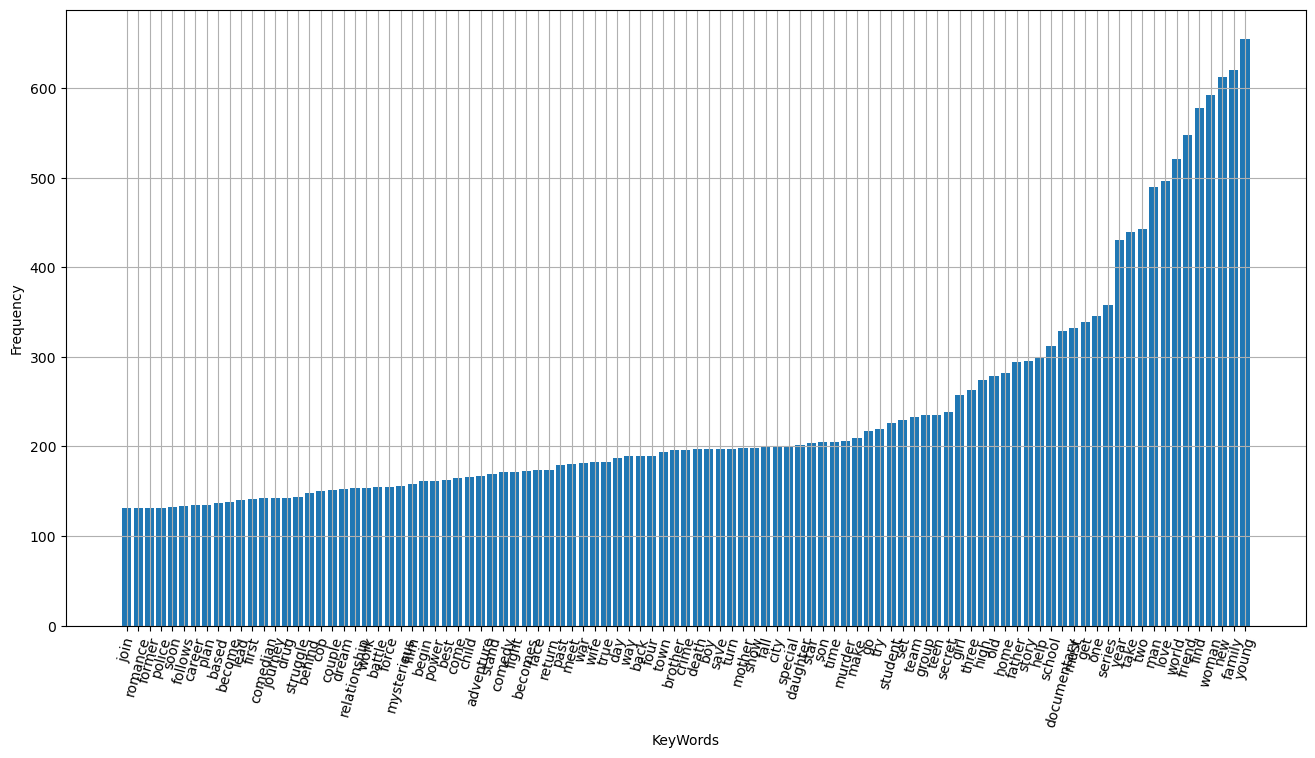

In [45]:
plt.figure(figsize = (16, 8))
plt.xlabel('KeyWords')
plt.ylabel('Frequency')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = False)
sorted_Values = sorted(word_count.values(), reverse = False)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

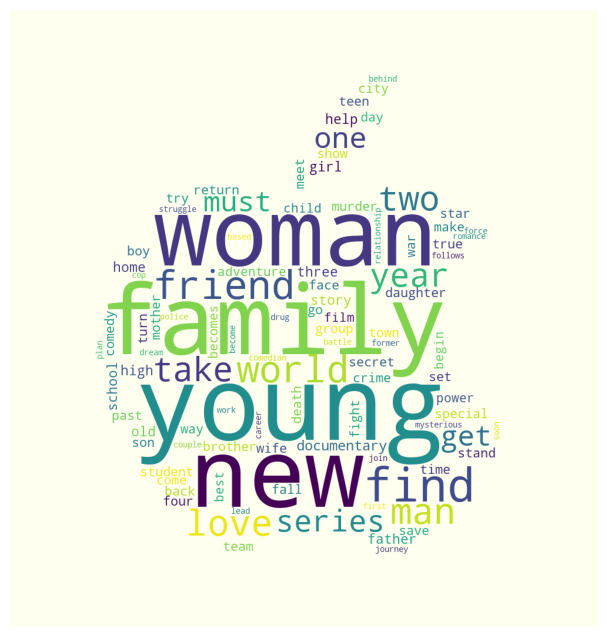

In [43]:
import numpy as np  
from PIL import Image
masking_image = np.array(Image.open("apple.jpg"))

wc = WordCloud(background_color = 'ivory', width = 960, height = 800, mask = masking_image)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()